<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#load-data" data-toc-modified-id="load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load data</a></span></li><li><span><a href="#turn-spike-times-into-a-spike-train" data-toc-modified-id="turn-spike-times-into-a-spike-train-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>turn spike times into a spike train</a></span></li><li><span><a href="#smooth-spike-times-into-firing-rates" data-toc-modified-id="smooth-spike-times-into-firing-rates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>smooth spike times into firing rates</a></span></li><li><span><a href="#zscore-firing-rates" data-toc-modified-id="zscore-firing-rates-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>zscore firing rates</a></span></li></ul></div>

For practice, turn spike times into smoothed firing rates

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import mat73
from os.path import join as pjoin
import scipy.signal as signal
import scipy.stats as stats

## load data

In [8]:
data_dir = "data_clean"
fname_spk = "George00_rec14_01282021-units.mat"

spk_mat = mat73.loadmat(pjoin(data_dir, fname_spk))

In [47]:
# extract one unit
freq = 1000 # Hz 
unit = spk_mat["SPK_SPKC065a"] # mV on this channel
max_t = 1+unit.max()
ts = np.arange(freq*max_t)/freq # time in seconds

## turn spike times into a spike train

In [48]:
# unit firing rate:
avg_fr = len(unit)/max_t # Hz

In [51]:
# make spike train
spk_train = np.zeros(ts.shape)
spk_idx = np.round(unit * freq).astype(int)
spk_train[spk_idx] = 1

## smooth spike times into firing rates

In [73]:
box = signal.boxcar(49)/49

spk_fr = np.convolve(spk_train, box, 'same')

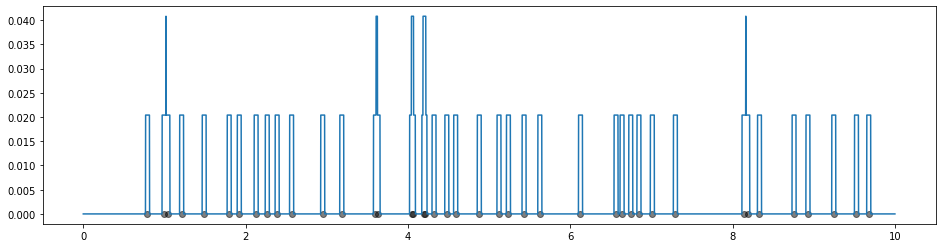

In [74]:
fig, ax = plt.subplots(figsize=(16,4))

N = 10000
idx = unit < N/freq
ax.scatter(unit[idx], np.zeros((1, sum(idx))), c="k", alpha=0.5)
ax.plot(ts[:N], spk_fr[:N])
ax.set_xlabel("time (s)")
ax.set_ylabel("firing rate (Hz)")

## zscore firing rates

In [76]:
spk_frnorm = stats.zscore(spk_fr)

Text(0, 0.5, 'norm firing rate ($\\sigma$)')

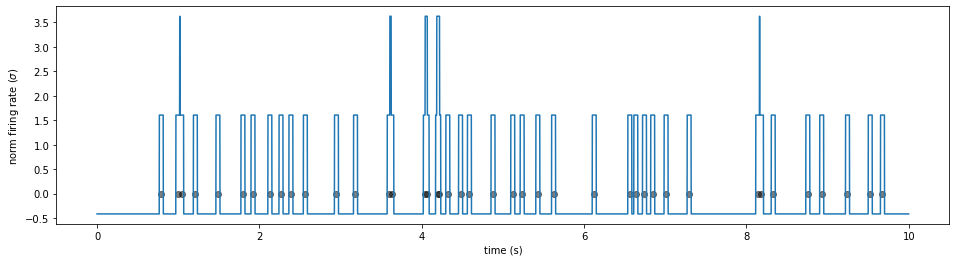

In [82]:
fig, ax = plt.subplots(figsize=(16,4))

N = 10000
idx = unit < N/freq
ax.scatter(unit[idx], np.zeros((1, sum(idx))), c="k", alpha=0.5)
ax.plot(ts[:N], spk_frnorm[:N])
ax.set_xlabel("time (s)")
ax.set_ylabel("norm firing rate ($\sigma$)")
